In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 14})

# Atomic Spectroscopy and the Bohr Model
by Troy C. Messina

## Introduction
In 1888 Johannes Rydberg found an empirical model for light emitted from atoms. He did not fully understand the physics of the model.

$$\frac{1}{\lambda} = R_H\left(\frac{1}{n^2_1}-\frac{1}{n^2_2}\right)$$

where $\lambda$ is the observed emission wavelength of the atomic gas. $R_H$ is a constant known as the Rydberg constant. $n_1$ is an integer for the final, lower energy orbit of the electron and $n_2$ initial, higher energy orbit. Rydberg did not know these integers corresponded to total energy quantum numbers. The visible spectral lines of hydrogen are shown in Figure 1. They correspond to $n_1=2$ and 

| n_2 | WL (nm) |
|-------|----------------|
|   3   |     656.3      |
|   4   |     486.1      |
|   5   |     434.0      |
|   6   |     410.2      |

<img src="./Emission_spectrum-Hpng.png" alt="Hydrogen emission spectrum" width="500">
<center>Figure 1. Hydrogen emission spectrum.</center>

In 1913, after much more atomic theory had been developed, Bohr started from Newton's second law to describe the behavior of electrons on atoms. The electrostatic force is the only external force on the orbiting electron. If the orbit is circular, the observed motion is the centripetal force.

$$\begin{align}
\frac{1}{4\pi\epsilon_o}\frac{Ze^2}{r^2} &= \frac{mv^2}{r}\\
\frac{1}{4\pi\epsilon_o}\frac{Ze^2}{r} &= mv^2
\end{align}$$

$Z$ is the number of positive charges in the nucleus. This second equation says the the electrostatic potential energy is twice the kinetic energy in magnitude. We can write

$$\begin{align}
mv^2 &= \frac{1}{4\pi\epsilon_o}\frac{Ze^2}{r}\\
\frac{\left(mvr\right)^2}{mr} &= \frac{1}{4\pi\epsilon_o}\frac{Ze^2}{r}
\end{align}$$

Bohr assumed the orbital circumference of the electron must be an integer multiple of a wavelength that describes electron. See Figure 2. This came from de Broglie's hypothesis, which built upon Einstein and Planck's work to say that $mv = h/\lambda$. In Bohr's model $n \lambda = 2\pi r$, and therefore, $mv = nh/2\pi r$.

<img src="./bohr_orbits.gif" alt="Bohr orbital model" width="600">
<center>Figure 2. The Bohr model of electron orbits as waves.</center>

Substitute for $mvr$ to get

$$\begin{align}
\frac{1}{2}mv^2 &= \frac{1}{8\pi\epsilon_o}\frac{Ze^2}{r}\\
\frac{\left(mvr\right)^2}{2mr^2} &= \frac{1}{8\pi\epsilon_o}\frac{Ze^2}{r}\\
\frac{n^2h^2}{8\pi^2 mr^2} &= \frac{1}{8\pi\epsilon_o}\frac{Ze^2}{r}
\end{align}$$

Solving for $r$, we get

$$r = \frac{n^2h^2\epsilon_o}{Z\pi me^2}$$

Next, we write the total energy $E$ as

$$\begin{align}
E &= \frac{1}{2}mv^2 -\frac{1}{4\pi\epsilon_o}\frac{Ze^2}{r}\\
E &= \frac{1}{8\pi\epsilon_o}\frac{Ze^2}{r} - \frac{1}{4\pi\epsilon_o}\frac{Ze^2}{r}\\
E &= -\frac{n^2h^2}{8\pi^2 mr^2}\\
\end{align}$$

The negative sign means the electron is bound to the atom (in a potential energy well). Substituting for $r$, we get

$$E = -\frac{Z^2me^4}{8\epsilon^2_o h^2}\frac{1}{n^2}$$

Using the Planck energy of photons $hc/\lambda$ as being equal to the energy difference of two integers $n$, the emission lines are then

$$\lambda = \frac{8h^3\epsilon^2_o c}{Z^2me^4}\left(\frac{1}{n^2_1}-\frac{1}{n^2_2}\right)^{-1}$$

This form gives us the physical meaning of the Rydberg constant, $R_H$. The orbiting electron mass should be the reduced mass.

$$m = \frac{m_e~m_n}{m_e+m_n}$$

where $m_e$ is the electron mass and $m_n$ is the nuclear mass. This gives a slightly smaller mass for the hydrogen atom's electron compared to the deuterium electron ($9.104\times 10^{-31}$ kg vs. $9.107\times 10^{-31}$ kg). This will cause the spectral lines to be shifted to slightly shorter wavelengths for deuterium.

## Experimental
The spectroscope uses a discharge tube of hydrogen or deuterium, which electrostatically excites the gas causing it to emit light when electrons fall back to lower energies. Our eyes only see in the visible. Therefore, we will only observe visible emission lines, which are the Balmer series ($n_1 =2$). A diffraction grating with 300 lines/mm ($d = 3.33\times 10^{-6}$ m) causes light interference that separates the emission spectrum into its various emission lines according to

$$d \sin\theta = m\lambda$$

<img src="spectroscope.png" alt="Student spectroscope" width="500">
<center>Figure 3. Diagram of a student spectroscope</center>

We measure $\theta$ for each of the emission lines. Uncertainty is determined by measuring the angular width of the emission lines and dividing by two.

A separate USB spectrometer is used to compare our results using the student spectrometer. This spectrometer provides a measure of light intensity as a function of wavelength. We used a Python peak finding algorithm (`scipy.signal.find_peaks`) to get the spectral peaks associated with emission lines. The uncertainty in these values is determined by the half width of the spectral peaks.

## Results


### Calculate the expected wavelengths
Use the Bohr model derivation and the reduced mass to determine the expected emission wavelengths of hydrogen and deuterium.

In [72]:
me = 9.1093837e-31
mp = 1.67262192e-27
mn = 1.67492749804e-27
mrH = me*mp/(me+mp)
mrD = me*(mp+mn)/(me+mp+mn)
h = 6.626e-34
e = 1.602e-19
c = 3e8
eps0 = 8.85e-12
n2 = np.array([3, 4, 5, 6])
n1 = 2

lamH = 8*h**3*eps0**2*c/(mrH*e**4)*(1/n1**2-1/n2**2)**-1
lamD = 8*h**3*eps0**2*c/(mrD*e**4)*(1/n1**2-1/n2**2)**-1
print("Expected Hydrogen Emissions", np.around(lamH*1e9, decimals=1))
print("Expected Deuterium Emissions", np.around(lamD*1e9, decimals=1))

Expected Hydrogen Emissions [656.6 486.3 434.2 410.4]
Expected Deuterium Emissions [656.4 486.2 434.1 410.2]


The experiment consisted of a diffraction grating with 300 lines/mm. We were able to measure the first $m=1$ and second $m=2$ order interference fringes. The initial angle of the spectrometer when viewing the undiffracted light was $\theta=176.433^o$. All emission line diffraction angles were referenced as a change in angle from this reference.

The uncertainty from the derivative rule is

$$\Delta \lambda = \frac{d\cos\theta}{m} \cdot \Delta \theta$$

where $\Delta\theta$ must be in radians. I measured the left and right side of a few spectral lines. They were 5/30 to 8/30 in arcminutes.

In [74]:
theta0 = 176.433#initial angle of the spectrometer
d = 1/300/1000 #mm/line / 1000 for meters
m = np.array([1, 1, 1, 2, 2, 2])
H_theta = theta0-np.array([169, 168.042, 165.067, 161.1167, 159.183, 153])
D_theta = theta0-np.array([168.4167, 167.467, 165, 161.183, 159.1, 153.017])
H_wavelengths = d*np.sin(H_theta*np.pi/180)/m#calculate from interference conditions for the angles above
D_wavelengths = d*np.sin(D_theta*np.pi/180)/m#calculate from interference conditions for the angles above
#Uncertainty?
DeltaTheta = 0.003 #0.003 is about 5/30 on the vernier scale
H_wav_unc = d*np.cos(H_theta*np.pi/180)/m*DeltaTheta
D_wav_unc = d*np.cos(D_theta*np.pi/180)/m*DeltaTheta

print (np.around(H_wavelengths*1e9, decimals=1))
print (np.around(H_wav_unc*1e9, decimals=1))
print (np.around(D_wavelengths*1e9, decimals=1))
print (np.around(D_wav_unc*1e9, decimals=1))

[431.2 486.4 656.9 440.2 494.2 662.8]
[9.9 9.9 9.8 4.8 4.8 4.6]
[464.8 519.5 660.7 438.4 496.5 662.3]
[9.9 9.9 9.8 4.8 4.8 4.6]


Hydrogen spectrum has the following results

| Expected | Experimental (m=1) | Experimental (m=2) |
|----------|--------------------|--------------------|
|	656.6  | 656.9 +/- 9.8      | 662.8 +/- 4.6      |
| 	486.3  | 486.4 +/- 9.9      | 494.2 +/- 4.8      |
|	434.2  | 431.2 +/- 9.9      | 440.2 +/- 4.8      |
|	410.4  |                    |                    |

And for deuterium

| Expected | Experimental (m=1) | Experimental (m=2) |
|----------|--------------------|--------------------|
|	656.4  | 660.7 +/- 9.8      | 662.3 +/- 4.6      |
| 	486.2  | 519.5 +/- 9.9      | 496.5 +/- 4.8      |
|	434.1  | 464.8 +/- 9.9      | 438.4 +/- 4.8      |
|	410.2  |                    |                    |

The Pasco USB spectrometer will save files as csv or Excel. These can be read into Jupyter with Pandas. Make sure the file has the format

| Wavelength (nm) | Intensity |
|-----------------|-----------|
|      380        |    0.00   |
|      ...        |    ...    |
|      900        |    0.00   |

You may need to replace `excel` below with `csv` depending on the file type from the spectrometer.

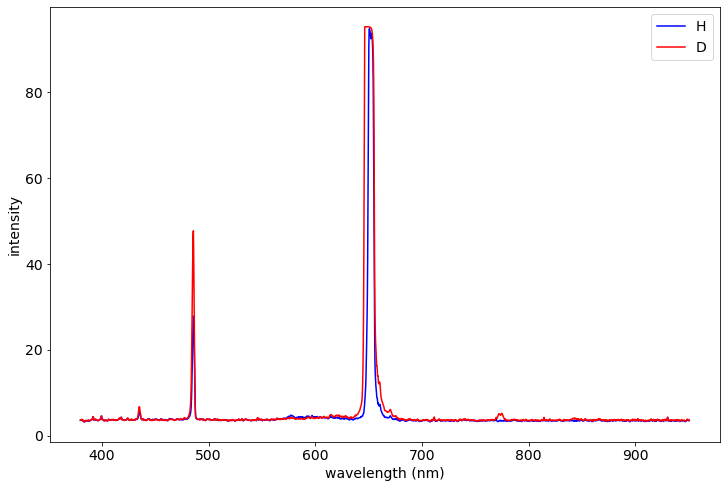

In [58]:
#Read and check the data file from the spectrometer
H_spectrum = pd.read_csv('hydrogen2.csv')
H_spectrum.head()
D_spectrum = pd.read_csv('deuterium.csv')
D_spectrum.head()

plt.plot(H_spectrum['Wavelength (nm)'], H_spectrum['Intensity'], '-b', label='H')
plt.plot(D_spectrum['Wavelength (nm)'], D_spectrum['Intensity'], '-r', label='D')
plt.xlabel('wavelength (nm)')
plt.ylabel('intensity')
#plt.xlim(640,660)
#plt.ylim(0,20)
plt.legend()
plt.show()

Find the wavelengths that hydrogen emits light by using a peak finder algorithm. You will need to adjust `height` (how tall is the shortest peak) and `distance` (minimum number of data points between peaks).

In [46]:
maxlocs, _ = find_peaks(H_spectrum['Intensity'], height=5.0, distance=25) #find maxima
#Create x and y lists for the peaks found
peaksH = np.array(H_spectrum['Intensity'].iloc[maxlocs]) #get the peak heights
peaksHx = np.array(H_spectrum['Wavelength (nm)'].iloc[maxlocs]) #get the peak wavelengths
print(peaksHx) #print to see what you get

[434.973 485.629 650.634 658.821]


Make a graph to see if you found the peaks properly. If not go back to the cell above and try again. Once the peaks are found correctly, the print statement above gives the wavelengths for comparing to the manual spectrometer data.

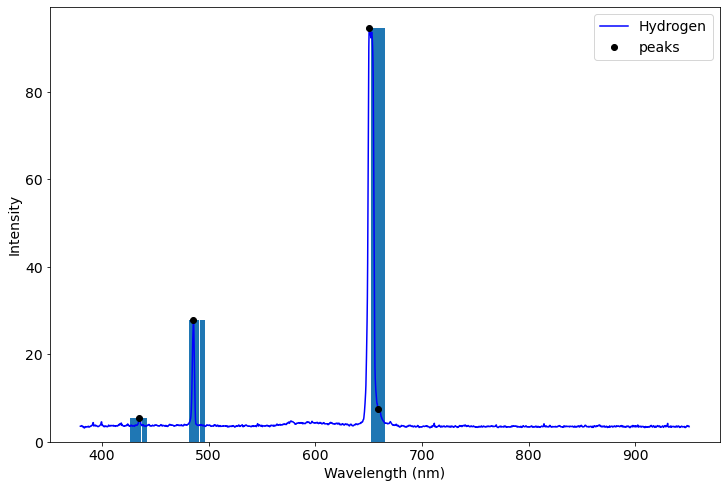

In [47]:
#Plot the spectrum
plt.plot(H_spectrum['Wavelength (nm)'], H_spectrum['Intensity'], '-b', label="Hydrogen")
#plot the peaks
plt.plot(peaksHx, peaksH, 'ok', label='peaks')
#plot the manual spectrometer data with widths equal to uncertainty
plt.bar(H_wavelengths*1e9, [peaksH[0], peaksH[1], peaksH[2], peaksH[0], peaksH[1], peaksH[2]], width=H_wav_unc*1e9)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend()
plt.show()

The hydrogen lines up pretty well. Now, let's do deuterium.

In [48]:
maxlocsD, _ = find_peaks(D_spectrum['Intensity'], height=5.0, distance=25) #find maxima
#Create x and y lists for the peaks found
peaksD = np.array(D_spectrum['Intensity'].iloc[maxlocsD]) #get the peak heights
peaksDx = np.array(D_spectrum['Wavelength (nm)'].iloc[maxlocsD]) #get the peak wavelengths
print(peaksDx) #print to see what you get

[434.973 485.629 647.078 658.548 670.236 774.725]


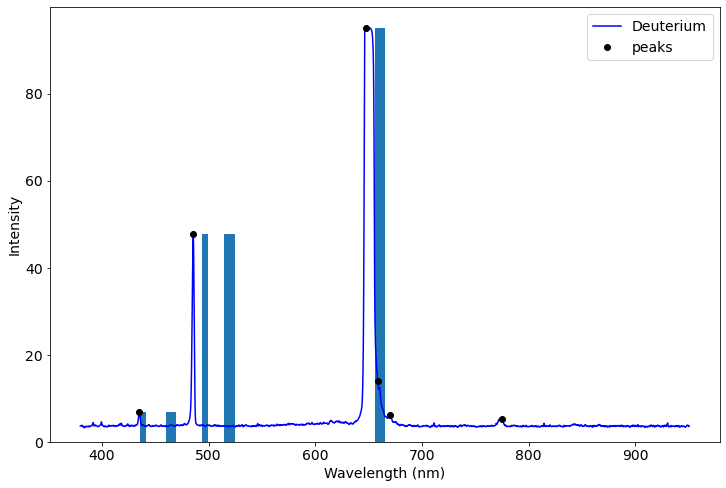

In [49]:
#Plot the spectrum
plt.plot(D_spectrum['Wavelength (nm)'], D_spectrum['Intensity'], '-b', label="Deuterium")
#plot the peaks
plt.plot(peaksDx, peaksD, 'ok', label='peaks')
#plot the manual spectrometer data with widths equal to uncertainty
plt.bar(D_wavelengths*1e9, [peaksD[0], peaksD[1], peaksD[2], peaksD[0], peaksD[1], peaksD[2]], width=D_wav_unc*1e9)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend()
plt.show()

Hydrogen spectrum has the following results

| Expected | Experimental (m=1) | Experimental (m=2) | Experimental (spectrometer) |
|----------|--------------------|--------------------|-----------------------------|
|	656.3  | 656.9 +/- 9.8      | 662.8 +/- 4.6      |          650.6 +/- 2.5      |
| 	486.1  | 486.4 +/- 9.9      | 494.2 +/- 4.8      |          485.6 +/- 1.5      |
|	434.0  | 431.2 +/- 9.9      | 440.2 +/- 4.8      |          435.0 +/- 1.0      |
|	410.2  |                    |                    |                             |

I calculated the uncertainties in the spectra by zooming in on each peak and taking half the width.
For deuterium

| Expected | Experimental (m=1) | Experimental (m=2) | Experimental (spectrometer) |
|----------|--------------------|--------------------|-----------------------------|
|	656.3  | 660.7 +/- 9.8      | 662.3 +/- 4.6      |          647.1 +/- 5.0      |
| 	486.1  | 519.5 +/- 9.9      | 496.5 +/- 4.8      |          485.6 +/- 2.5      |
|	434.0  | 464.8 +/- 9.9      | 438.4 +/- 4.8      |          435.0 +/- 1.0      |
|	410.2  |                    |                    |                             |

## Conclusions
For the most part, the experiments agree with the expected values. A few fall outside of the uncertainties. For example, the $m=2$ data for hydrogen and some of the $m=2$ for deuterium are too large of wavelengths measured. We expect the mass of the electron in the Bohr model to be the reduced mass as described in the Introduction. This would make the electron mass slightly more massive in deuterium, leading to shorter wavelength emission lines. We do not observe this within the uncertainty of our experiment.